<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#What-is-Classification?" data-toc-modified-id="What-is-Classification?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong><font color="red">What is Classification?</font></strong></a></span></li><li><span><a href="#So-What-the-Types-of-Classification?" data-toc-modified-id="So-What-the-Types-of-Classification?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><strong><font color="orange">So What the Types of Classification?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span></li></ul></li><li><span><a href="#Acquiring" data-toc-modified-id="Acquiring-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acquiring</a></span></li><li><span><a href="#Preparation---Imputing-and-Encoding-Focus" data-toc-modified-id="Preparation---Imputing-and-Encoding-Focus-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparation - Imputing and Encoding Focus</a></span></li><li><span><a href="#Exploring" data-toc-modified-id="Exploring-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring</a></span><ul class="toc-item"><li><span><a href="#Using-simple-plt" data-toc-modified-id="Using-simple-plt-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Using simple plt</a></span></li><li><span><a href="#Using-Object-Oriented-or-Class" data-toc-modified-id="Using-Object-Oriented-or-Class-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Using Object Oriented or Class</a></span></li></ul></li><li><span><a href="#Evaluating" data-toc-modified-id="Evaluating-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluating</a></span><ul class="toc-item"><li><span><a href="#What-Are-Types-of-Evaluation-for-Classification-Models?" data-toc-modified-id="What-Are-Types-of-Evaluation-for-Classification-Models?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><strong><font color="red">What Are Types of Evaluation for Classification Models?</font></strong></a></span></li><li><span><a href="#So-What?" data-toc-modified-id="So-What?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><strong><font color="orange">So What?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#What-Are-Types-of-Classification-Models?" data-toc-modified-id="What-Are-Types-of-Classification-Models?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><strong><font color="red">What Are Types of Classification Models?</font></strong></a></span></li><li><span><a href="#So-What?" data-toc-modified-id="So-What?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span><strong><font color="orange">So What?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span></li></ul></li></ul></div>

In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pydataset import data

from explore import anatomy_of_a_figure
from env import host, user, password

## Classification

### **<font color=red>What is Classification?</font>**

**Classification is a Supervised Machine Learning technique.** Like Regression, it also uses labeled data from a training dataset to learn the rules for predicting the label or output variable by using an input variable or variables. The goal is that the model can use the rules it learns from your training dataset to make predictions on future, unseen datasets. However, **classification is used to predict category membership** of observations in a dataset using a decision boundary that you set to learn and apply a decision rule. 

**Simply put, Regression predicts a continuous variable while classification predicts a categorical variable.**

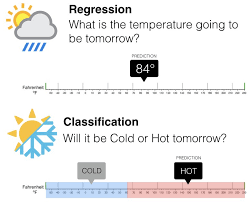

### **<font color=orange>So What the Types of Classification?</font>**

**Types of Classification**

>**Binary Classification -** This type of classification uses a decision rule to predict an observation to be a member of one of only two groups: churn/not churn, pass/fail, male/female, smoker/non-smoker, healthy/sick.

>**Multiclass Classification -** This type of classification uses a decision rule to predict an observation to be a member of one of three or more possible groups or categories: A/B/C, hot/warm/cold, Python/Java/C++/Go/C

![image.png](https://developers.google.com/machine-learning/guides/text-classification/images/LastLayer.png)

**Uses for Classification**


### **<font color=green>Now What?</font>**

We will work through the data science pipeline focused on preparing for Classification Modeling.

## Acquiring

**<font color=orange>A Few Example Methods for Creating Pandas DataFrames</font>**

>**Create your DataFrame using a SQL query to access and database**

**<font color=purple>Use your env file and a handy function to get your connection_url argument</font>**

`from env import host, pasword, user`

`def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'`
    
`sql_query = 'write your sql query here; test it in Pancakes first'`

`pd.read_sql(sql_query, connection_url)`

**<font color=purple>Put it all together in a single function and throw it into a .py file.</font>**

`def get_titanic_data():
    return pd.read_sql(query, get_connection('titanic_db'))`

In [25]:
def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [26]:
sql_query = 'SELECT * FROM passengers'

In [27]:
def get_titanic_data():
    return pd.read_sql(sql_query, get_connection('titanic_db'))

In [28]:
titanic_df = get_titanic_data()
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1


>**Create your DataFrame using a csv file, a Google sheet, from AWS S3**

`pd.read_csv()`

**<font color=purple>If you are going to read in a Google sheet using its Share url, you can format it correctly using the following:</font>**

`sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'`  

`csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')`

`df_googlesheet = pd.read_csv(csv_export_url)`

In [18]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [19]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [21]:
df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


>**Create your DataFrame using copy-pasted tabular data**

`pd.read_clipboard(header=None, names=colums)`

>**Create your DataFrame using an Excel sheet**

`pd.read_excel('Excel_Workbook.xlsx', sheet_name='Table1_name', usecols=['this_one', 'this_one'])`

In [34]:
customers_df = pd.read_excel('my_telco_churn.xlsx', sheet_name='Table2_CustDetails')
customers_df.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,tenure,churn
0,7569-NMZYQ,Female,0,Yes,Yes,2,2,2,Bank transfer (automatic),118.75,8672.45,73.031158,No
1,8984-HPEMB,Female,0,No,No,2,2,2,Electronic check,118.65,8477.60,71.450485,No
2,5734-EJKXG,Female,0,No,No,2,2,1,Electronic check,118.60,7365.70,62.105396,No


>**Create your DataFrame using Pydata sets and Read the Doc**

`from pydataset import data`

`data('iris', show_doc=True)`

`df_iris = data('iris')`

In [3]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [10]:
# Using Seaborn Datasets

iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [11]:
# Using Sklearn Datasets, dictionary-like object

from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [12]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [15]:
iris_df['species'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**Other Seaborn Datasets you can use are linked [here](https://github.com/mwaskom/seaborn-data)**

**More on sklearn dataset loading utilities [here](https://scikit-learn.org/stable/datasets/index.html)**

## Preparation - Imputing and Encoding Focus

What is Imputing?

When we impute data, we fill in missing values with another value. The value you choose to impute for missing values depends on several factors

>Total missing values by column

`df.isna().sum`

>Percent of missing values by column

`df.isna().mean`

>Investigate the relationship between two columns

`pd.crosstab(df.col_name, df.col_name)`

**<font color=red>Split before you begin doing specific exploration or calculations as you do data processing</font>**

>Check the missing values in subgroups. Zach's cool code snippet!

`train.groupby(['this_col', 'that_col', 'another_col']).agg(lambda s: s.isna().sum())`

----
>Fill all missing values in your train and test DataFrames with NaN

`train, test = fill_na(train, test, np.nan)`

>Fill a column in your train and test with 0 in original DataFrames

`train['col'] = train['col'].fillna(0)`

`test['col'] = test['col'].fillna(0)`

>Fill with overall average from the training data, then fill in train and test.

`avg_age = train.age.mean()`   #Calculate our fill value using train only

`train.age. train.age.fillna(avg_age)`

`test.age. test.age.fillna(avg_age)`

>Using SimpleImputer from sklearn

**Create the imputer**

`imputer = sklearn.impute.SimpleImputer(strategy='mean')`

**Fit the imputer to train[['col']]**

`imputer.fit(train[['age']])`

**Use the Imputer**

`train.age = imputer.transform(train[['age']])`

`test.age = imputer.transform(test[['age']])`

**What if our missing value is a categorical**

`train.column.value_counts(dropna=False)`   # Find the most frequent value

`train.column = train.column.fillna('categorical_value')`  # Fill that value into train and test

`test.column = test.column.fillna('categorical_value')`

**What is Label Encoding**

Encoding is when we convert a string to a number to make a categorical value useable in a ML model. **This is useful when the order of your categorical values carries meaning.**

>Using sklearn LabelEncoder() 


**What is One-hot Encoding**

One-hot Encoding is when we create a new column of 0s and 1s to represent the unique values in a column into   **This is useful when the order of your categorical values does not carry meaning.** Beware of the curse of dimensionality when using One-hot; it can quickly increase the number of columns, and therfore complexity, of your model exponentially.

>Using sklearn OneHotEncoder()

`ohe = sklearn.preprocessing.OneHotEncoder(sparse=False, categories='auto)`

`train_ohe = ohe.fit_transform(train[['column]])`



`test_ohe = ohe.transform(test[['column]])

## Exploring

### **<font color=red>What is EDA (Exploratory Data Analysis)?</font>**



**The preparation for your dataset for exploration may not be the same as the prepartion of your dataset for modeling.** The requirements of Machine Learning algorithms do not always overlap with the requirements for good data visualization or exploration.

### **<font color=orange>So What Types of Viz are best for exploring categorical vs continuous data?</font>**

`plt.rc('figure', figsize=(num, num))`

`plt.rc('font', size=13)`

>boxplot

`sns.boxplot(x='categorical', y='continous', data=train , hue= , )`

>swarmplot

`sns.swarmplot(x='categorical', y='continous', data=train , hue=  )`

>violinplot

`sns.violinplot(x='categorical', y='continous', data=train , hue=  )`

>The groupby creates a Series with an index of the survival values and the mean fare value for each index value. Adding .plot.bar() turns the index of your groupby into xlabels and the values into bar heights. **This is such a useful code snippet to put in your back pocket!**

`train.groupby('survival').fare.mean().plot.bar()`

>Subplots

`fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)`

`ax1.hist(train[train.survived == 1].fare, bins=20)`

`ax1.set(title='Survived')`

`ax2.hist(train[train.survived == 0].fare, bins=20)`

`ax2.set(title='Did Not Survive', xlabel='Fare')`

>Heatmap

`ctab = pd.crosstab(train.survived, train.pclass)`

`sns.heatmap(ctab, annot=True, cmap='Greens', fmt='d')`

**Inspect percentages of overall population**

`ctab = pd.crosstab(train.survived, train.pclass, normalize=True)`

`sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.2%')`

**Inspect percentages by group**

`x1 = 'embark_town'`

`x2 = 'pclass'`

`(train.groupby(x1)[x2]                              # normalize=False shows raw value counts, not percentages
   .apply(lambda s: s.value_counts(normalize=True))  # custom aggregate to get value counts by group
   .unstack()                                        # turn an index into columns
   .plot.bar(stacked=True, width=.9)                 # bars
   )`
`plt.legend(title=x2)`

`plt.xticks(rotation=9)`

`plt.xlabel('')`

>Number and Percentage of People Who Survived

`train.survived.sum()`

`train.survived.mean()`

**Same but by Sex**

`train.groupby('Sex).survived.mean().plot.bar(ec='black', fc='hotpink', width=2)`

`plt.hline(train.survived.mean(), *plt.xlim(), ls='--', color='grey', label='average survival rate')`

`plt.xticks(rotation=0)`

`plt.xlabel('')`

`plt.ylabel('Survival Rate')`

plt.hlines(height, starts, ends)   (^^ is like y, xmin, xmax)

`plt.legend()`

>Exploring 'Categorical' Target by 2 Different Categories

`train.groupby(['pclass', 'sex']).survived.mean()`

`ctab = pd.crosstab(train.pclass, train.sex, valued=train.survived, aggFunc='mean')`

`sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.1%')`

OR
 
`ctab = train.pivot_table('survived', 'pclass', 'sex')`    # df.pivot_table(values, rows, columns)

>`pd.melt()` allows us to combine multiple continuous measures on the same visualization


>Binning for Exploration - Turning a continuous variable into a categorical one for viz

`train['age_bin'] = pd.cut(train.age, bins = [0, 18, 80], labels=['child', 'adult'])`# splits age into 2 bins, 0-18 and 18-80

`train.groupby('age_bin').survived.mean()`       # inspect survival rate of children and adults

`pd.qcut(train.age, 3)`      # even intervals

`pd.qcut(train.age, 3)`      # even number of observations in each interval

>.melt() - This function deaggregates obesrvations; it gives you a key-value column pair


>.pivot_table() - This function aggregates observations

(pd.melt(dataframe, [columns_to_keep], var_name='new_name for the 'key' column' ))

**There's some pretty cool EDA code and explanation in [this article.](https://towardsdatascience.com/exploratory-data-analysis-for-linear-regression-classification-8a27da23debc) Check it out!**

**Here are the official matplotlib [tutorials](https://matplotlib.org/3.1.1/tutorials/index.html#introductory)**

### Subplots Using Simple pyplot

`plt.subplot(2, 1, 1)` # figure 1 of 2

`plt.plot(x, y)`       # everything up until the next subplot is on the first

`plt.show()`
    
`plt.subplot(2, 1, 2)` # figure 2 of 2

`plt.plot(y, x)`       # everything up until the next subplot is on the second

`plt.show()`

### Using Matplotlib Object-Oriented API

A figure in matplotlib is divided into two different objects:

- The Figure Class: It can contain one or more axes objects.

- The Axes Object: It represents one plot inside of a figure object.

subplots(nrows, ncols)

`fig, axes = plt.subplots(2,1)`

`axes[0].plot(x, y)`

`axes[0].set(title='My Title')`

`axes[1].plot(y, x)`

`axes[1].set(title='My Title')`

`axes[1].set_xticklabels()`

`fig.tight_layout()`

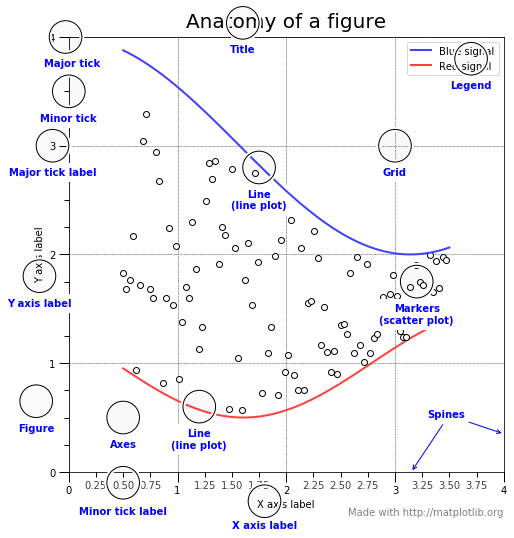

In [17]:
anatomy_of_a_figure()

## Evaluating

### **<font color=red>What Are Types of Evaluation for Classification Models?</font>**

To evaluate the performance of a classification model, you can use a Confustion Matrix. 

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSmzFvEZ0uhNbNa39AP7Yd_Net4osjEHOxurVREHFKHqEKZwwnQ&usqp=CAU)



### **<font color=orange>So What?</font>**


### **<font color=green>Now What?</font>**

>**Create a Classification Report**

**Accuracy:** This tells you how often your classifier is **predicting correctly overall**. 

This is the ratio of all of your correct predictions over all of your data points. 

(Total Number Correct / Total Number of Data Points) -> (TP + TN / TP + TN + FP + FN)

**Recall (Sensitivity):** The tells you how often your classifier is predicting positives correctly. 

If this score is high, you didn’t miss a lot of positives, but as it gets lower, you are not predicting the positives that are actually there. **You want to optimize for recall when missed positives are expensive.**

<font color=red>**Low Recall Score == More Type II Errors / Misses / False Negatives.**</font>

(Total Number of Correct Positive Predictions / Total Number of Positive Predictions) -> (TP / TP + FN)

**Precision:** This tells you how often your model was able to **predict positives correctly.** 

If this score is low, you predicted a lot of positives where there were none 

(Low Precision Score == More Type I Errors / False Alarms / False Positives). () -> (TP / TP + FP)

**Specificity:** When the observtion is actually negative, how often does your classifier predict negative? (TN / FP + TN)

**f1-score:** The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.

**Support:** number of occurrences of each class in where y is true.

----

**Baseline:** Predicting the most common case for everything.

- 70% of your observations are non-smokers. You predict all of your observations are non-smokers. Your Baseline predicts correctly 70% of the time, or in other words, your baseline accuracy is 70%. If your model doesn't predict correctly more than 70% of the time, your model doesn't add value.

## Modeling

### **<font color=red>What Are Types of Classification Models?</font>**

>**Logistic Regression Model**


>**Decision Tree Model**


>**Random Forest Model**


>**K-Nearest Neighbor**

### **<font color=orange>So What?</font>**


### **<font color=green>Now What?</font>**